In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

import warnings 
warnings.filterwarnings("ignore")

!pip install apyori
from apyori import apriori

  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5979 sha256=d8c4b8a9ef9a6c9e3c6a4e7396166d1ef17750cf695cee44bc08ec2c608900bb
  Stored in directory: c:\users\mncedisi.mncwabe\appdata\local\pip\cache\wheels\cb\f6\e1\57973c631d27efd1a2f375bd6a83b2a616c4021f24aab84080
Successfully built apyori


In [12]:
data = pd.read_csv("C:/Users/mncedisi.mncwabe/Videos/Practice/Market Basket Analysis/Groceries_dataset.csv")

In [6]:
data.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [7]:
data.shape

(38765, 3)

In [8]:
data.isnull().sum()/len(data)*100

Member_number      0.0
Date               0.0
itemDescription    0.0
dtype: float64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [13]:
data['Date'] = pd.to_datetime(data['Date'])

In [26]:
data['Weekday'] = data['Date'].dt.day_name()
data['Month'] = data['Date'].dt.month_name()
data['Year'] = data['Date'].dt.year
data['Day'] = data['Date'].dt.day

In [21]:
data.head()

,Member_number,Date,itemDescription,Day_of_Week,Month,Year,Day
0,1808,2015-07-21,tropical fruit,Tuesday,July,2015,21
1,2552,2015-05-01,whole milk,Friday,May,2015,1
2,2300,2015-09-19,pip fruit,Saturday,September,2015,19
3,1187,2015-12-12,other vegetables,Saturday,December,2015,12
4,3037,2015-01-02,whole milk,Friday,January,2015,2


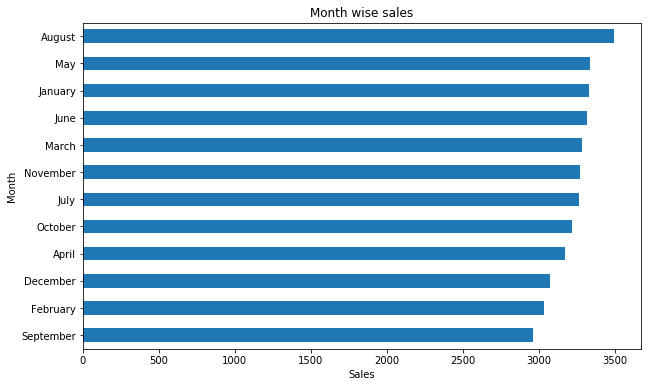

In [25]:
data.groupby('Month')['Member_number'].count().sort_values(ascending=True).plot(kind='barh',figsize=(10,6))
plt.title("Month wise sales")
plt.xlabel("Sales");

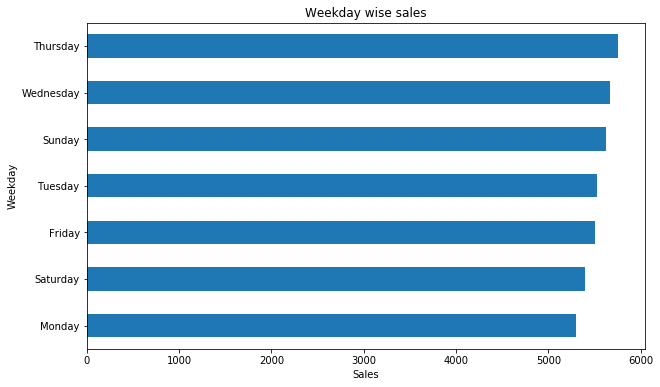

In [27]:
data.groupby('Weekday')['Member_number'].count().sort_values(ascending=True).plot(kind='barh',figsize=(10,6))
plt.title("Weekday wise sales")
plt.xlabel("Sales");

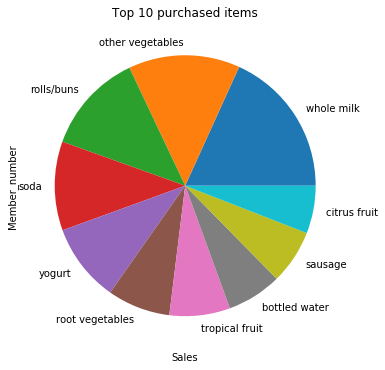

In [46]:
data_v2 = data.groupby('itemDescription')['Member_number'].count().sort_values(ascending=False)
data_v2.head(10).plot(kind='pie',figsize=(10,6))
plt.title("Top 10 purchased items")
plt.xlabel("Sales");

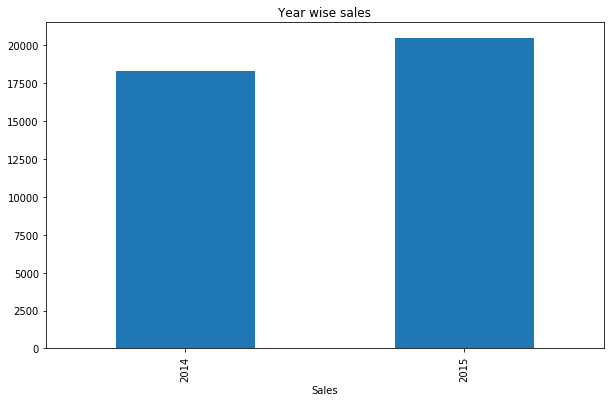

In [44]:
data.groupby('Year')[Member_number'].count().sort_values(ascending=True).plot(kind='bar',figsize=(10,6))
plt.title("Year wise sales")
plt.xlabel("Sales");

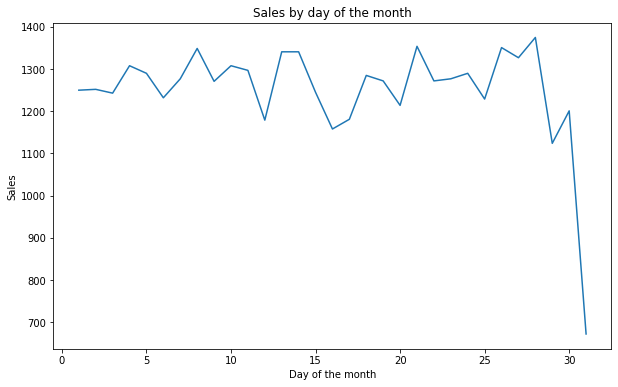

In [45]:
plt.figure(figsize=(10,6))

day = data.groupby(['Day'])['Member_number'].count()
plot = [x for x, df in data.groupby('Day')]

plt.plot(plot, day)
plt.xlabel("Day of the month")
plt.ylabel("Sales")
plt.title("Sales by day of the month");

### Apriori 

https://www.kaggle.com/nataliadelarosa/grocery-mba?scriptVersionId=67540366&cellId=33

In [50]:
# In order to apply the Apriori algorithm, a new dataframe "a basket"
# is created that contains a list of items each member purchased on each day

basket_df = data.groupby(['Member_number','Date'],as_index=True)['itemDescription'].apply(lambda x: list(x))
transactions = basket_df.values.tolist()

transactions[:10]

[['whole milk', 'pastry', 'salty snack'],
 ['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
 ['soda', 'pickled vegetables'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['sausage', 'whole milk', 'rolls/buns'],
 ['whole milk', 'soda'],
 ['frankfurter', 'soda', 'whipped/sour cream'],
 ['frankfurter', 'curd'],
 ['beef', 'white bread']]

In [ ]:
# Since there are many association rules that are possible the Apriori algorithm is used to placed constraints 
# so that the most interesting rules are selected 

Support represents the popularity of an item in the itemset. 
Setting the support to a minimum value creates a threshold that identifies significant item pairs.

Confidence signifies the likelihood of item Y being purchased when item X is purchased. 
The confidence value can be misleading if both items are popular. 
It could be that X and Y appear together frequently because of their individual popularity and 
not necessarily an association between them. Lift considers the popularity of item Y 
when determining the likelihood of it being purchased in the same transaction as item X. 

A lift value greater than one can be indicative of a pattern between the items


In [53]:
# Using the apriori function to create the association rules.

association_rules = apriori(transactions, min_support=0.0003, min_lift=2, min_confidence=0.05, min_length=2)
association_results = list(association_rules)

# Using the association rules yiels 104 rules that meet the qualifications.
print(len(association_results))

104


In [54]:
results = []
for item in association_results:
    itemset = item[0]                 # store first value of the item
    items = [x for x in itemset]

    value0 = str(items[0])
    value1 = str(items[1])
    value3 = str(item[1])[:7]
    value4 = str(item[2][0][2])[:7]
    value5 = str(item[2][0][3])[:7]

    rows = (value0, value1, value3, value4, value5)
    results.append(rows)
    columns = ['item_x', 'item_y', 'support', 'confidence', 'lift']

    associations_df = pd.DataFrame(results, columns=columns)
    associations_df.head(5)

In [ ]:
# The results of applying Apriori to the dataset indicate that the items whole milk, 
# and sausage have the highest support values and the lift is approximately 2.18. 
# It can be assumed that yogurt and sausage are common breakfast items in the 
# US and that is why they are purchased together frequently.

In [55]:
associations_df = associations_df.sort_values(by=['support', 'lift'],
                            ascending=[False, False]).head(100)
associations_df.head(20)

,item_x,item_y,support,confidence,lift
101,whole milk,yogurt,0.00147,0.13173,2.18291
2,whole milk,brandy,0.00086,0.34210,2.16628
27,tropical fruit,sweet spreads,0.00073,0.16176,2.38706
13,soft cheese,hamburger meat,0.00060,0.06000,2.74550
96,whole milk,pork,0.00060,0.39130,2.47781
99,whipped/sour cream,yogurt,0.00060,0.20454,2.38180
25,soda,spices,0.00060,0.225,2.31705
11,ham,pickled vegetables,0.00053,0.05970,3.48950
20,pip fruit,sweet spreads,0.00053,0.11764,2.39830
9,mustard,frankfurter,0.00053,0.08695,2.30288


In [58]:
# Max support value. -  suggesting that these items are often bought together
associations_df.sort_values(by='support',ascending=False).head(1)

,item_x,item_y,support,confidence,lift
101,whole milk,yogurt,0.00147,0.13173,2.18291


In [57]:
# Max lift value. 
associations_df.sort_values(by='lift',ascending=False).head(1)

,item_x,item_y,support,confidence,lift
63,curd,fruit/vegetable juice,0.00033,0.5,8.28516


In [ ]:
# The itemset of fruit/vegetable juice and sausage have the highest lift value of 8.29 
# and a relatively high confidence value of 50%. However, the support value is low suggesting that they 
# are not purchased as frequently as other items in the dataset.